Step 1. pip install sklearn (It is a machine learning library that we will eventually get to in the course)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

**Terminology**: 

$H_o$ : Null Hypothesis - What you assume to be true. (Don't say you choose the null, say I accept the null) Always contains an equal sign. So (<=, =, or >=)

$H_1$ : Alternative Hypothesis - What you are trying to prove as true. (Reject the null hypothesis) Opposite sign of the null hypothesis

**P-value**: If H_o is true, the probability of obtaining the observed statistic, or one more extreme, in favor of the alternative hypothesis.

$\alpha$ : Alpha. The threshold at which you would either reject or fail to reject the null hypothesis given a p-value. Typical alpha's are 0.05% or 0.01% for sensitive data such as in the medical field where more certainty is required.

**Type 1 Error**: Predicting the Alternative Hypothesis when in fact the Null is True (False Positive) Worse than type 2 error.

**Type 2 Error**: Predicting the Null hypothesis when in fact the Alternative is True (False Negative)

**Bootstrapping**: Simulating the sampling distribution. Sampling with replacement.

In [2]:
data = load_boston() #loading dataset

In [7]:
df = pd.DataFrame(data.data, columns = data.feature_names) #creates dataframe

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [39]:
df['MEDV'] = data.target #creates our target variable (Median Value)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2,36.2


*** Is Crime Statistically Significant in Determining House Price? (MEDV - Median Value)***

$H_o \space(Null) : H_o >= H_1$

$H_1 \space(Alternative): H_o < H_1$

Our null hypothesis is that high crime areas are greater than or equal to the value of low crime areas. You always want to assume the best outcome. 

In [12]:
crime_mean = np.mean(df.CRIM)

In [22]:
high_crime = (df[df['CRIM'] > crime_mean].MEDV)
low_crime = (df[df['CRIM'] <= crime_mean].MEDV)

In [23]:
observed_diff = np.mean(low_crime) - np.mean(high_crime)
observed_diff

8.409677352336235

Our observed difference tells us that the low crime areas have a $84000 increase in average price. Is this statistically significant though?

In [38]:
#Bootstrapping

diffs = [] #create placeholder for calculations

for i in range(10000): #run for 10000 iterations
    low_crime_sample = np.mean(low_crime.sample(20, replace = True)) #take sample of 20 low crime area house values and compute the mean
    high_crime_sample = np.mean(high_crime.sample(20, replace = True))#take sample of 20 of high crime area and compute the mean
    
    differences = low_crime_sample - high_crime_sample #compute differences in our random samples
    diffs.append(differences) #add to our list

P-Value =  0.0008


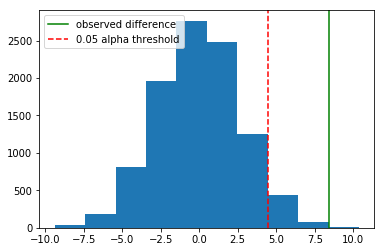

In [40]:
simulation = np.random.normal(0, np.std(diffs), 10000) #creates normal distribution of our simulated differences. Must include the standard deviation as 2nd argument. 10000 represents the total samples we computed differences on
plt.hist(simulation)#plot hist of simulated normal distribution
plt.axvline(observed_diff, color = 'green', linestyle = '-')#plots our original observed difference from our dataset
plt.axvline(np.percentile(simulation, 95), color='red', linestyle = '--')#plots the alpha threshold being 0.05% in our case. This can also be thought of as the 95% confidence interval
plt.legend(['observed difference', '0.05 alpha threshold',])#plot legend
print("P-Value = ",  (simulation > observed_diff).mean()) #compute p-value by calculating how much total volume of our distribution falls above our observed difference.

Given our P-Value of 0.0008 we reject the null hypothesis and conclude that crime is infact statisitcally significant in predicting the median value of homes. Now we can say with statisitical certainty that our hypothesis that high crime areas affect house prices is correct.